# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos dados

In [2]:
data = pd.read_csv('./dados.csv')

# Análise superficial dos dados

In [3]:
data.head()

,Perguntas,Tags
0,Possuo um projeto Node.js porém preciso criar ...,node.js
1,"Gostaria de fazer testes unitários no Node.js,...",node.js
2,Como inverter a ordem com que o jQuery itera u...,jquery
3,Eu tenho uma página onde pretendo utilizar um ...,html
4,Como exibir os dados retornados do FireStore e...,html angular


In [4]:
len(data.Tags.unique())

37

# Pré-processamento 1

In [5]:
labels = []
for tags in data.Tags.unique():
    for tag in tags.split(' '):
        if tag not in labels and tag != '':
            labels.append(tag)

In [6]:
labels

['node.js', 'jquery', 'html', 'angular']

In [7]:
node_js = list()
for linha_tag in data.Tags:
    if 'node.js' in linha_tag:
        node_js.append(1)
    else:
        node_js.append(0)

jquery = list()
for linha_tag in data.Tags:
    if 'jquery' in linha_tag:
        jquery.append(1)
    else:
        jquery.append(0)

html = list()
for linha_tag in data.Tags:
    if 'html' in linha_tag:
        html.append(1)
    else:
        html.append(0)

angular = list()
for linha_tag in data.Tags:
    if 'angular' in linha_tag:
        angular.append(1)
    else:
        angular.append(0)
        

In [8]:
binary_labels = []
for i in labels:
    list_label = []
    for linha_tag in data.Tags:
        if i in linha_tag:
            list_label.append(1)
        else:
            list_label.append(0)
    binary_labels.append(list_label)
    
data[labels] = pd.DataFrame(dict(zip(labels, binary_labels)))
data.head()

,Perguntas,Tags,node.js,jquery,html,angular
0,Possuo um projeto Node.js porém preciso criar ...,node.js,1,0,0,0
1,"Gostaria de fazer testes unitários no Node.js,...",node.js,1,0,0,0
2,Como inverter a ordem com que o jQuery itera u...,jquery,0,1,0,0
3,Eu tenho uma página onde pretendo utilizar um ...,html,0,0,1,0
4,Como exibir os dados retornados do FireStore e...,html angular,0,0,1,1


# Pré-processamento 2 (train_test_split)

In [12]:
from sklearn.model_selection import train_test_split

In [24]:
lista_zip = list(zip(data[labels[0]],
                    data[labels[1]],
                    data[labels[2]],
                    data[labels[3]]))
                
data['list_labels'] = lista_zip
data.head()

,Perguntas,Tags,node.js,jquery,html,angular,list_labels
0,Possuo um projeto Node.js porém preciso criar ...,node.js,1,0,0,0,"(1, 0, 0, 0)"
1,"Gostaria de fazer testes unitários no Node.js,...",node.js,1,0,0,0,"(1, 0, 0, 0)"
2,Como inverter a ordem com que o jQuery itera u...,jquery,0,1,0,0,"(0, 1, 0, 0)"
3,Eu tenho uma página onde pretendo utilizar um ...,html,0,0,1,0,"(0, 0, 1, 0)"
4,Como exibir os dados retornados do FireStore e...,html angular,0,0,1,1,"(0, 0, 1, 1)"


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.Perguntas, 
                                                    data.list_labels, 
                                                    random_state= 123,
                                                    test_size=0.2
                                                    )

In [29]:
X_train

1577       array1 = [1,2,3];   array2 = ["um","dois","...
1927    Não sei se fui claro no título, mas quem é da ...
3409    Alguém sabe me dizer qual a melhor forma de re...
4606    Estou com problemas ao tentar validar campos d...
5237    Preciso copiar um valor de dentro de um CODE  ...
                              ...                        
5218    Tenho um sisteminha, para mudar o layout da pá...
4060    Como fazer alto scoll ao carregar a página?  E...
1346    Explicação:  Tenho uma CODE  pai que contém du...
3454    Estou querendo fazer um sistema onde eu iria t...
3582    Galera eu to com um problemão, ja pesquisei ba...
Name: Perguntas, Length: 4326, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vetorizador = TfidfVectorizer(max_features=5_000, max_df=0.85)
vetorizador

TfidfVectorizer(max_df=0.85, max_features=5000)

In [37]:
vetorizador.fit(data.Perguntas)
X_train = vetorizador.transform(X_train)
X_test = vetorizador.transform(X_test)

In [42]:
print(X_train.shape)
print(X_test.shape)

(4326, 5000)
(1082, 5000)


# Treinamento de modelo base

In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
tags_treino_array = np.asarray(list(y_train))
tags_teste_array = np.asarray(list(y_test))

print(tags_teste_array)

[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]]


In [50]:
classificador_LogisticRegression = LogisticRegression()
classificador_OneVsRest = OneVsRestClassifier(classificador_LogisticRegression)


classificador_OneVsRest.fit(X_train, tags_treino_array)

OneVsRestClassifier(estimator=LogisticRegression())

In [55]:
score_classificador = classificador_OneVsRest.score(X_test, tags_teste_array)
print('Resultado {0: 0.2f}%'.format(score_classificador *100))

Resultado  41.68%


In [66]:
predict = classificador_OneVsRest.predict(X_test)

In [60]:
tags_teste_array[0:5]

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0]])

In [62]:
len(data.list_labels.unique())

13

In [65]:
from sklearn.metrics import hamming_loss

In [68]:
1 - hamming_loss(tags_teste_array, predict)

0.8116913123844732

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_15508/1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

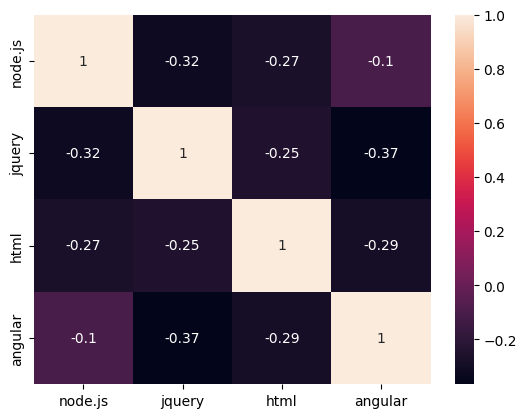

In [69]:
sns.heatmap(data.corr(), annot=True)

# Classificação em cadeia